# Prophetで日経平均を予測

https://qiita.com/AfricaUmare/items/759202e3fed7dc3bca86

In [11]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

df = pd.read_csv('^N225.csv') #日経平均のCSVを読み込み
print(df.head())

          Date      Open      High       Low     Close  Adj Close Volume
0  Apr 17 2018  21801.83  21889.89  21772.42  21847.59   21847.59  57400
1  Apr 16 2018  21843.55  21879.69  21775.61  21835.53   21835.53  53400
2  Apr 13 2018  21801.41  21917.35  21746.69  21778.74   21778.74  73100
3  Apr 12 2018  21657.87  21719.43  21591.39  21660.28   21660.28  58400
4  Apr 11 2018  21819.09  21837.36  21687.10  21687.10   21687.10  69500


In [13]:
df2 = df.loc[:, ['Date', 'Close']] #日付と終値を抽出
df2 = df2.rename(columns={'Date': 'ds', 'Close': 'y'}) #系列名をds, yに変更 
print(df2.head())

            ds         y
0  Apr 17 2018  21847.59
1  Apr 16 2018  21835.53
2  Apr 13 2018  21778.74
3  Apr 12 2018  21660.28
4  Apr 11 2018  21687.10


In [14]:
df2['y'] = np.log(df2['y']) # logで正規化
print(df2.head())

            ds         y
0  Apr 17 2018  9.991846
1  Apr 16 2018  9.991294
2  Apr 13 2018  9.988690
3  Apr 12 2018  9.983235
4  Apr 11 2018  9.984473


In [16]:
m = Prophet()
m.daily_seasonality = True #オプション
m.fit(df2) 

future = m.make_future_dataframe(periods=180) #180日将来まで予測
future.tail()

,ds
1413,2018-10-10
1414,2018-10-11
1415,2018-10-12
1416,2018-10-13
1417,2018-10-14


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1413,2018-10-10,10.053585,9.786615,10.292228
1414,2018-10-11,10.054130,9.773911,10.287707
1415,2018-10-12,10.054846,9.763511,10.293316
1416,2018-10-13,10.042708,9.762780,10.283864
1417,2018-10-14,10.043995,9.757657,10.283403


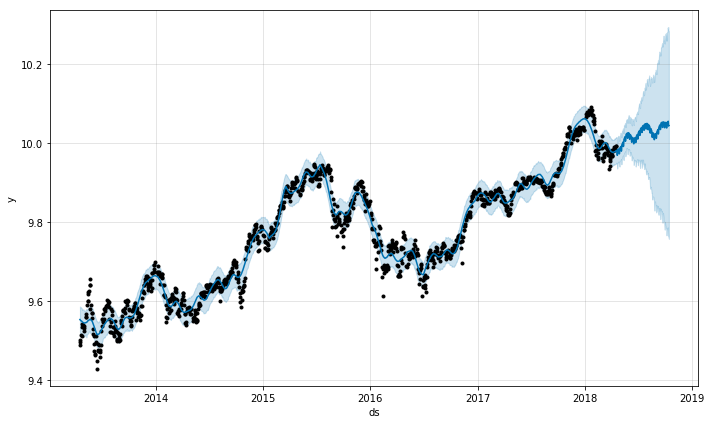

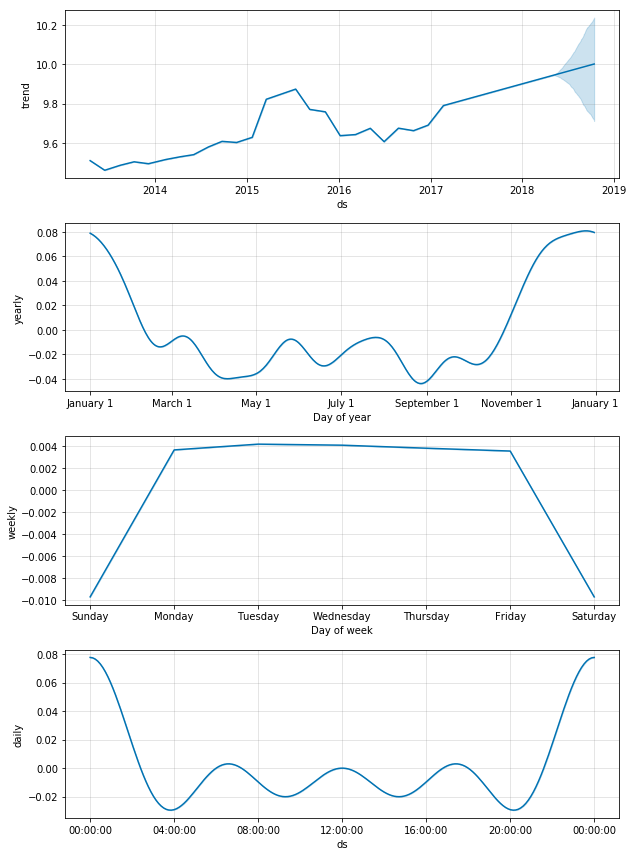

In [19]:
fig1 = m.plot(forecast) #予測結果のグラフ
fig2 = m.plot_components(forecast)